# Import packages

In [1]:
import os
import pandas as pd
import ptitprince as pt #Ref: https://github.com/pog87/PtitPrince/blob/master/tutorial_python/raincloud_tutorial_python.ipynb
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Custom functions

In [2]:
from histogram_data_cleaning import plot_original_vs_filtered
from histogram_data_parameters import csv_files_in_dir,extract_all_parameters_from_csv_files
from histogram_display import display_all_histogram_as_line_plots
from pooled_data_display import remove_outliers_by_group
from statistics_display import stat_output_as_img

# Clean each histogram data
Use IQR method

In [3]:
csv_files_list = csv_files_in_dir('input')
csv_files_list

['input\\Histogram_data\\histogram_data_for_GEVAL30_EtOH_12.07.12.csv',
 'input\\Histogram_data\\histogram_data_for_GEVAL30_EtOH_12.08.00.csv',
 'input\\Histogram_data\\histogram_data_for_GEVAL30_EtOH_12.08.46.csv',
 'input\\Histogram_data\\histogram_data_for_GEVAL30_EtOH_12.09.46.csv',
 'input\\Histogram_data\\histogram_data_for_GEVAL30_EtOH_12.11.38.csv',
 'input\\Histogram_data\\histogram_data_for_GEVAL30_EtOH_12.12.32.csv',
 'input\\Histogram_data\\histogram_data_for_GEVAL30_EtOH_12.13.02.csv',
 'input\\Histogram_data\\histogram_data_for_GEVAL30_EtOH_12.14.17.csv',
 'input\\Histogram_data\\histogram_data_for_GEVAL30_EtOH_12.15.17.csv',
 'input\\Histogram_data\\histogram_data_for_GEVAL30_EtOH_12.16.00.csv',
 'input\\Histogram_data\\histogram_data_for_GEVAL30_EtOH_12.16.48.csv',
 'input\\Histogram_data\\histogram_data_for_GEVAL30_EtOH_12.17.51.csv',
 'input\\Histogram_data\\histogram_data_for_GEVAL30_EtOH_12.18.41.csv',
 'input\\Histogram_data\\histogram_data_for_GEVAL30_EtOH_12.19.2

## Clean each histogram data

In [4]:
new_csv_files_list = []
for file in csv_files_list:
    original_df = pd.read_csv(file)

    filtered_original_df = plot_original_vs_filtered(original_df,
                                                     plot_show=False)

    subfolder_name = 'cleaned_histogram'

    # Create the new directory path with the inserted subfolder
    new_directory = os.path.join(os.path.dirname(file), subfolder_name)

    # Create the directory if it doesn't exist
    if not os.path.exists(new_directory):
        os.makedirs(new_directory)

    new_file_path = os.path.join(new_directory, os.path.basename(file))

    new_csv_files_list.append(new_file_path)

    filtered_original_df.to_csv(new_file_path, index=False) #New file will overwrite
    # the original file

In [5]:
new_csv_files_list

['input\\Histogram_data\\cleaned_histogram\\histogram_data_for_GEVAL30_EtOH_12.07.12.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_GEVAL30_EtOH_12.08.00.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_GEVAL30_EtOH_12.08.46.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_GEVAL30_EtOH_12.09.46.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_GEVAL30_EtOH_12.11.38.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_GEVAL30_EtOH_12.12.32.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_GEVAL30_EtOH_12.13.02.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_GEVAL30_EtOH_12.14.17.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_GEVAL30_EtOH_12.15.17.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_GEVAL30_EtOH_12.16.00.csv',
 'input\\Histogram_data\\cleaned_histogram\\histogram_data_for_GEVAL30_EtOH_12.16.48.csv',

In [6]:
results_df = extract_all_parameters_from_csv_files(new_csv_files_list)
results_df

meta_data.csv has been saved to output\meta_data.csv. Label the data as you like locally using Excel before import it back for later steps!


,csv_file_name,mean,median,mode
0,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.124937,0.125,0.136
1,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.169083,0.166,0.127
2,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.112751,0.112,0.135
3,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.155178,0.167,0.179
4,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.164610,0.161,0.174
...,...,...,...,...
179,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.258092,0.262,0.147
180,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.405220,0.380,0.300
181,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.273796,0.278,0.283
182,C:\Users\louie\Desktop\GitHub\GEVALDataProcess...,0.297368,0.320,0.346


# Display all histograms

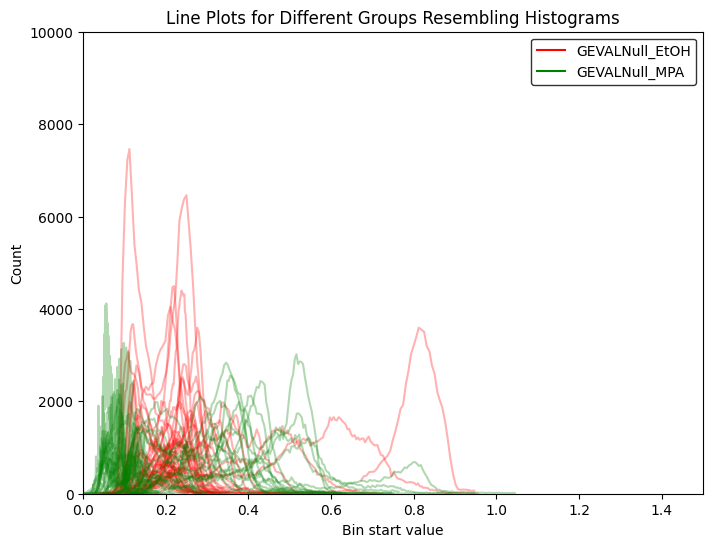

In [11]:
display_all_histogram_as_line_plots(
    new_csv_files_list,
    split_filename_components_list=[
        'GEVALNull_EtOH',
        'GEVALNull_MPA'
    ],
    xlim_min = 0,
    xlim_max = 1.5,
    ylim_min = 0,
    ylim_max = 10000,
    color_lists=['red', 'green', 'blue', 'orange','purple', 'brown', 'pink', 'gray']
)

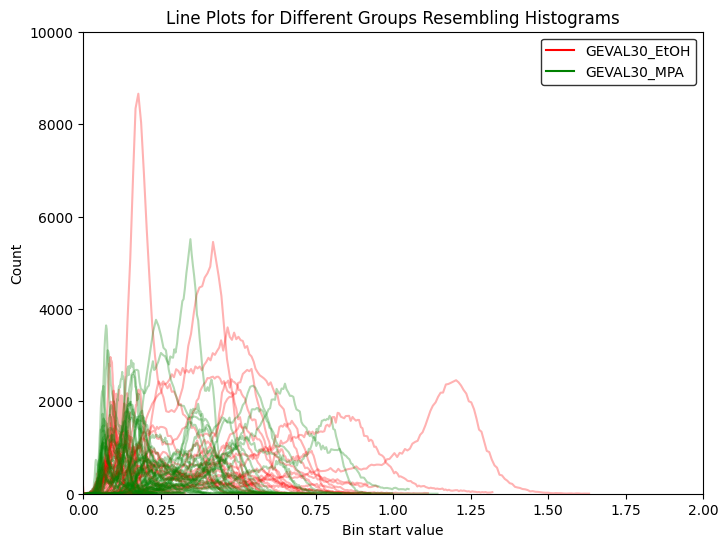

In [10]:
display_all_histogram_as_line_plots(
    new_csv_files_list,
    split_filename_components_list=[
        'GEVAL30_EtOH',
        'GEVAL30_MPA'
    ],
    xlim_min = 0,
    xlim_max = 2,
    ylim_min = 0,
    ylim_max = 10000,
    color_lists=['red', 'green', 'blue', 'orange','purple', 'brown', 'pink', 'gray']
)

# Label extracted meta data
Use Excel to label the meta data csv file

# Read in labeled data

In [14]:
labeled_df = pd.read_csv('input\\meta_data_labeled.csv')
labeled_df

,GEVAL,treatment,mean,median,mode
0,GEVAL30,EtOH,0.124937,0.125,0.136
1,GEVAL30,EtOH,0.169083,0.166,0.127
2,GEVAL30,EtOH,0.112751,0.112,0.135
3,GEVAL30,EtOH,0.155178,0.167,0.179
4,GEVAL30,EtOH,0.164610,0.161,0.174
...,...,...,...,...,...
179,GEVALNull,MPA,0.258092,0.262,0.147
180,GEVALNull,MPA,0.405220,0.380,0.300
181,GEVALNull,MPA,0.273796,0.278,0.283
182,GEVALNull,MPA,0.297368,0.320,0.346


# Analyses

## Mean

In [15]:
labeled_df_mean = labeled_df[['GEVAL', 'treatment', 'mean']]
# labeled_df_mean = labeled_df_mean[labeled_df_mean['treatment']!='MPA']
labeled_df_mean

,GEVAL,treatment,mean
0,GEVAL30,EtOH,0.124937
1,GEVAL30,EtOH,0.169083
2,GEVAL30,EtOH,0.112751
3,GEVAL30,EtOH,0.155178
4,GEVAL30,EtOH,0.164610
...,...,...,...
179,GEVALNull,MPA,0.258092
180,GEVALNull,MPA,0.405220
181,GEVALNull,MPA,0.273796
182,GEVALNull,MPA,0.297368


In [16]:
labeled_df_mean_cleaned = remove_outliers_by_group(labeled_df_mean,
                                                   ['GEVAL', 'treatment'],
                                                   'mean')
labeled_df_mean_cleaned

,GEVAL,treatment,mean
0,GEVAL30,EtOH,0.124937
1,GEVAL30,EtOH,0.169083
2,GEVAL30,EtOH,0.112751
3,GEVAL30,EtOH,0.155178
4,GEVAL30,EtOH,0.164610
...,...,...,...
179,GEVALNull,MPA,0.258092
180,GEVALNull,MPA,0.405220
181,GEVALNull,MPA,0.273796
182,GEVALNull,MPA,0.297368


Text(0.5, 1.0, 'Mean values for raw data')

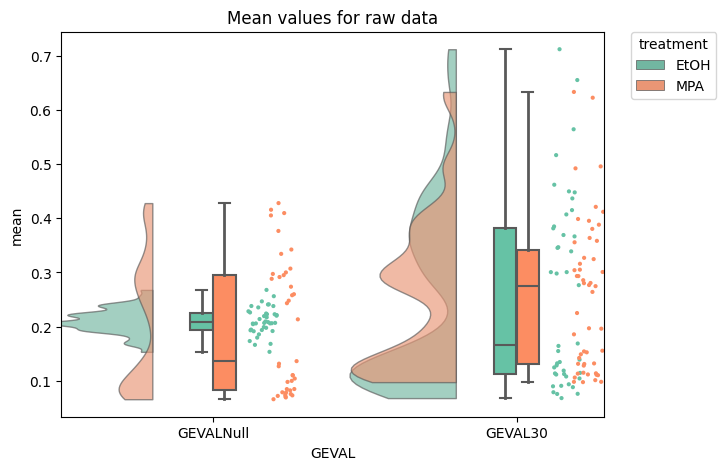

In [20]:
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.RainCloud(
    x = 'GEVAL',
    order=['GEVALNull', 'GEVAL30'],
    y = 'mean',
    hue='treatment',
    hue_order=['EtOH', 'MPA'],
    data = labeled_df_mean_cleaned,
    palette ='Set2',
    bw = 0.2,
    width_viol = .7,
    ax = ax,
    orient = 'v',
    move = .2,
    alpha = 0.65,
    dodge=True
)

ax.set_title('Mean values for raw data')

## Statistics

                         sum_sq     df         F    PR(>F)
C(GEVAL)               0.116872    1.0  6.991133  0.008958
C(treatment)           0.001317    1.0  0.078798  0.779274
C(GEVAL):C(treatment)  0.000846    1.0  0.050585  0.822318
Residual               2.841918  170.0       NaN       NaN


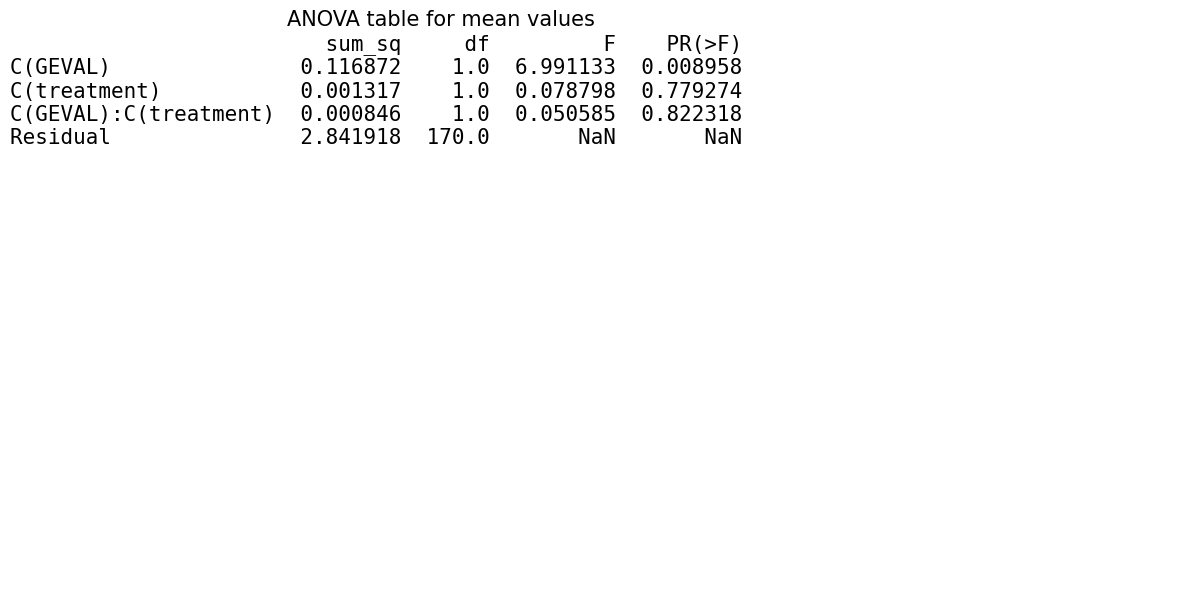

In [18]:
formula = 'mean ~ C(GEVAL) + C(treatment) + C(GEVAL):C(treatment)'
model = ols(formula, data=labeled_df_mean_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

stat_output_as_img(anova_table, 'ANOVA table for mean values')

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
  GEVAL30_EtOH    GEVAL30_MPA  -0.0015 0.9999 -0.0705 0.0676  False
  GEVAL30_EtOH GEVALNull_EtOH  -0.0476 0.3356 -0.1208 0.0257  False
  GEVAL30_EtOH  GEVALNull_MPA  -0.0579  0.179 -0.1317 0.0159  False
   GEVAL30_MPA GEVALNull_EtOH  -0.0461 0.3336 -0.1169 0.0248  False
   GEVAL30_MPA  GEVALNull_MPA  -0.0564 0.1736 -0.1278 0.0149  False
GEVALNull_EtOH  GEVALNull_MPA  -0.0103 0.9846 -0.0858 0.0652  False
-------------------------------------------------------------------


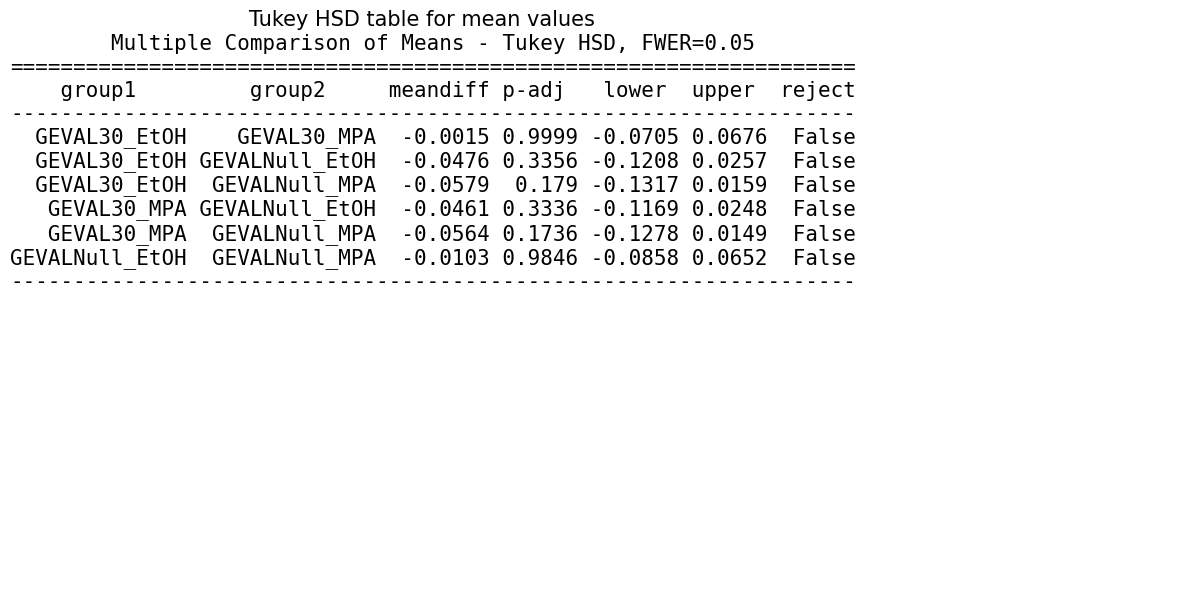

In [19]:
# Perform Tukey's HSD test for the interaction effect
interaction_group = labeled_df_mean_cleaned["GEVAL"] + '_' + \
                    labeled_df_mean_cleaned["treatment"]
tukey_interaction = pairwise_tukeyhsd(endog=labeled_df_mean_cleaned['mean'], groups=interaction_group, alpha=0.05)

# Display the Tukey HSD results
print(tukey_interaction)

stat_output_as_img(tukey_interaction, 'Tukey HSD table for mean values')